In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import re

In [2]:
data = pd.read_csv("data_file.csv", header = 0)

In [3]:
data.columns

Index(['name', 'description', 'Playable On', 'Genres', 'NA', 'EU', 'JP',
       'Additional Content', 'Single-Player', 'Speedrun', 'Retirement',
       'Platform', 'Type', 'Main Game', 'Multi-Player', 'Rating', 'Platform N',
       'Publishers', 'Developers'],
      dtype='object')

In [4]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=False)

data.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
0,Bomberman: Panic Bomber,Bomberman's hunt for the Golden Bomber statue.,NaN,"['Third-Person', 'Real-Time', 'Puzzle']",NaN,NaN,"December 22, 1994",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hudson Soft,Hudson Soft
1,RIP (2014),NaN,NaN,"['First-Person', 'Shooter']","October 31, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Axyos Games,Axyos Games
2,Mr. Postman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'Not enough data.': ['', '', '', '', '', '']}",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Capsule,Capsule is a single-player survival game playe...,['PC'],NaN,"February 04, 2012",NaN,NaN,NaN,"{'Main Story': ['4', '1h 41m', '1h 40m', '1h 3...",NaN,5.94,"{'PC': ['10', '1h 41m', '3h', '2h 29m', '1h 22...",NaN,NaN,NaN,47.0,{'PC': '23'},Finji,NaN
4,Spectrum 2000,NaN,NaN,"['Scrolling', 'Shooter']",2000,NaN,NaN,NaN,"{'Main + Extras': ['1', '28m', '28m', '28m', '...",NaN,NaN,"{'Not enough data.': ['', '', '', '', '', '']}",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape[0]

70322

Se revisan los NA por variable

In [6]:
pd.DataFrame([data.isna().sum(), (data.shape[0] - data.isna().sum()), (data.isna().sum()/data.shape[0])*100], index=['isna','total-isna','% na'])

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
isna,0.0,32522.000000,45122.000000,32973.000000,32265.000000,50646.000000,63845.000000,69683.000000,44447.000000,68051.00000,50881.000000,31516.0000,68786.000000,68869.00000,68328.000000,50881.000000,48162.000000,34097.00000,32563.000000
total-isna,70322.0,37800.000000,25200.000000,37349.000000,38057.000000,19676.000000,6477.000000,639.000000,25875.000000,2271.00000,19441.000000,38806.0000,1536.000000,1453.00000,1994.000000,19441.000000,22160.000000,36225.00000,37759.000000
% na,0.0,46.247263,64.164842,46.888598,45.881801,72.020136,90.789511,99.091323,63.204971,96.77057,72.354313,44.8167,97.815762,97.93379,97.164472,72.354313,68.487813,48.48696,46.305566


In [7]:
dataAux = data.copy()    

In [8]:
from ast import literal_eval

Convert a string into a dictionary for the Genres, Single-Player, Platform, Platform N and Main Game

In [9]:
def literal_return(val):
    try:
        return literal_eval(val)
    except (ValueError, SyntaxError) as e:
        return val
    
dataAux["Genres"] = dataAux["Genres"].apply(lambda x: literal_return(x) if not pd.isna(x) else x)
dataAux["Single-Player"] = dataAux["Single-Player"].apply(lambda x: literal_return(x) if not pd.isna(x) else x)
dataAux["Platform"] = dataAux["Platform"].apply(lambda x: literal_return(x) if not pd.isna(x) else x)
dataAux["Platform N"] = dataAux["Platform N"].apply(lambda x: literal_return(x) if not pd.isna(x) else x)
dataAux["Main Game"] = dataAux["Main Game"].apply(lambda x: literal_return(x) if not pd.isna(x) else x)

Delete dictionaries from Platform that contains not enough data description

In [10]:
def match_not_data(data):
    try:
        if list(data.keys())[0] == 'Not enough data.':
            return np.nan
        else:
            return data
    except Exception as e:
        return data
    
dataAux["Platform"] = dataAux["Platform"].apply(lambda x: match_not_data(x)).fillna(value=np.nan)

In [11]:
pd.DataFrame([dataAux.isna().sum(), (dataAux.notna().sum())], index=['isna','total-isna'])

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
isna,0,32522,45122,32973,32265,50646,63845,69683,44447,68051,50881,48396,68786,68869,68328,50881,48162,34097,32563
total-isna,70322,37800,25200,37349,38057,19676,6477,639,25875,2271,19441,21926,1536,1453,1994,19441,22160,36225,37759


Because the main objective are the Rating, Single-Player and Platform, if at least one of them is NaN, it's deleted

In [12]:
indexNames = dataAux[dataAux['Rating'].isna()].index
dataAux.drop(indexNames , inplace=True)

In [13]:
indexNames = dataAux[dataAux['Single-Player'].isna() & dataAux["Platform"].isna()].index
dataAux.drop(indexNames , inplace=True)

In [14]:
dataAux.shape

(16735, 19)

In [15]:
pd.DataFrame([dataAux.isna().sum(), (dataAux.notna().sum())], index=['isna','total-isna'])

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
isna,0,965,725,1012,959,9013,13102,16150,0,14651,0,836,16044,16050,15201,0,836,2659,2408
total-isna,16735,15770,16010,15723,15776,7722,3633,585,16735,2084,16735,15899,691,685,1534,16735,15899,14076,14327


Convert NA, EU, JP strings into date, however, if the date is only a year, the result date contains a day and a month (TAKE CARE)

In [16]:
from dateutil.parser import parse


def parse_game_dates(dateStr):
    date = None
    try:
        dateAux = parse(dateStr)
        return dateAux.date()
        #date = pd.to_datetime(dateStr), format="%B %d, %Y")
    except Exception as e:
        return dateStr
        
dataAux["NA"] = dataAux["NA"].apply(lambda x: parse_game_dates(x))
dataAux["EU"] = dataAux["EU"].apply(lambda x: parse_game_dates(x))
dataAux["JP"] = dataAux["JP"].apply(lambda x: parse_game_dates(x))
aux = parse('1988')
print(aux.date())

1988-09-09


In [17]:
dataAux.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
3,Capsule,Capsule is a single-player survival game playe...,['PC'],NaN,2012-02-04,NaN,NaN,NaN,"{'Main Story': ['4', '1h 41m', '1h 40m', '1h 3...",NaN,5.94,"{'PC': ['10', '1h 41m', '3h', '2h 29m', '1h 22...",NaN,NaN,NaN,47.0,{'PC': '23'},Finji,NaN
7,Fantasy Zone II: The Tears of Opa-Opa,NaN,"['Nintendo 3DS', 'Sega Master System']","[Scrolling, Shooter]",1987-12-09,1988-09-09,NaN,NaN,"{'Main Story': ['8', '1h 26m', '1h 30m', '59m'...",NaN,6.90,"{'Nintendo 3DS': ['3', '1h 48m', '--', '--', '...",NaN,NaN,NaN,70.0,"{'Nintendo 3DS': '4', 'Sega Master System': '7'}",NaN,NaN
11,Siege of Avalon,Siege of Avalon is a traditional fantasy-RPG w...,['PC'],"[Top-Down, Real-Time, Action, Role-Playing]",2000-04-27,NaN,NaN,NaN,"{'Main + Extras': ['3', '22h 31m', '26h', '16h...",NaN,11.11,"{'PC': ['3', '--', '22h 31m', '--', '9h 34m', ...",NaN,NaN,NaN,40.0,{'PC': '4'},NaN,Digital Tome
16,Codename: Outbreak,"In the early 21st century, a meteor storm hits...",['PC'],"[First-Person, Shooter]",2001-11-25,NaN,NaN,NaN,"{'Main Story': ['2', '5h 59m', '5h 59m', '4h 5...",NaN,15.38,"{'PC': ['2', '5h 59m', '--', '--', '4h', '7h 5...",NaN,NaN,NaN,60.0,{'PC': '4'},Virgin Interactive,GSC Game World
22,A Bird Story,"From the creator of To the Moon: A simple, wor...",['PC'],Adventure,2014-11-07,2014-11-07,NaN,NaN,"{'Main Story': ['314', '1h 17m', '1h 12m', '52...",NaN,2.16,"{'PC': ['612', '1h 17m', '1h 27m', '1h 27m', '...",NaN,NaN,NaN,68.0,{'PC': '1.5K'},Freebird Games,Freebird Games


Convert each number from Platform N, Single-Player and Platform from a string into a number

In [18]:
def convert_platform_to_thousands(dicts):
    if type(dicts) == dict:
        for key, value in dicts.items():
            try:
                if value.isdigit():
                    dicts[key] =  int(value)
                else:
                    value = int(float(value.strip( 'K' ))*1000)
                    dicts[key] = value
            except Exception as e:
                pass
    return dicts 
    

dataAux["Platform N"] = dataAux["Platform N"].apply(lambda x: convert_platform_to_thousands(x))

In [19]:
dataAux["Single-Player"][3]


{'Main Story': ['4', '1h 41m', '1h 40m', '1h 32m', '1h 50m'],
 'Main + Extras': ['1', '3h', '3h', '3h', '3h'],
 'Completionists': ['5', '2h 29m', '2h 08m', '1h 50m', '3h 09m'],
 'All PlayStyles': ['10', '2h 13m', '1h 59m', '1h 44m', '3h 03m']}

**Elementos del array de Single-Player y Platform**

Polled(Siempre un numero)	Average(Horas minutos)	Median(Horas minutos)	Rushed(Horas minutos)	Leisure(Horas minutos)

Estos numeros reflejan los resultados obtenidos para la cateogria listada en el diccionario.

Se reconvierten a segundos todos menos el primero.

In [20]:
def convert_text_to_number(dicts):
    if type(dicts) == dict:
        for key, value in dicts.items():
            try:
                for count, item in enumerate(value):
                    #print(count, type(item))
                    try:
                        if type(item) is int:
                            value[count] =  int(item) #si es un número se mantiene como tal
                        elif type(item) is str:
                            seconds = 0
                            for time in item.split(" "):
                                if(time[-1] == "h"):
                                    seconds += int(time[:-1]) * 3600
                                elif(time[-1] == "m"):
                                    seconds += int(time[:-1]) * 60                            
                            value[count] = seconds
                            dicts[key] = value
                            
                    except Exception as e:
                        pass
            except Exception as e:
                pass
    return dicts 
    

dataAux["Single-Player"] = dataAux["Single-Player"].apply(lambda x: convert_text_to_number(x))
dataAux["Platform"] = dataAux["Platform"].apply(lambda x: convert_text_to_number(x))

In [21]:
dataAux.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
3,Capsule,Capsule is a single-player survival game playe...,['PC'],NaN,2012-02-04,NaN,NaN,NaN,"{'Main Story': [0, 6060, 6000, 5520, 6600], 'M...",NaN,5.94,"{'PC': [0, 6060, 10800, 8940, 4920, 14400]}",NaN,NaN,NaN,47.0,{'PC': 23},Finji,NaN
7,Fantasy Zone II: The Tears of Opa-Opa,NaN,"['Nintendo 3DS', 'Sega Master System']","[Scrolling, Shooter]",1987-12-09,1988-09-09,NaN,NaN,"{'Main Story': [0, 5160, 5400, 3540, 7020], 'A...",NaN,6.90,"{'Nintendo 3DS': [0, 6480, 0, 0, 3720, 8760], ...",NaN,NaN,NaN,70.0,"{'Nintendo 3DS': 4, 'Sega Master System': 7}",NaN,NaN
11,Siege of Avalon,Siege of Avalon is a traditional fantasy-RPG w...,['PC'],"[Top-Down, Real-Time, Action, Role-Playing]",2000-04-27,NaN,NaN,NaN,"{'Main + Extras': [0, 81060, 93600, 60900, 101...",NaN,11.11,"{'PC': [0, 0, 81060, 0, 34440, 115200]}",NaN,NaN,NaN,40.0,{'PC': 4},NaN,Digital Tome
16,Codename: Outbreak,"In the early 21st century, a meteor storm hits...",['PC'],"[First-Person, Shooter]",2001-11-25,NaN,NaN,NaN,"{'Main Story': [0, 21540, 21540, 17940, 25080]...",NaN,15.38,"{'PC': [0, 21540, 0, 0, 14400, 28680]}",NaN,NaN,NaN,60.0,{'PC': 4},Virgin Interactive,GSC Game World
22,A Bird Story,"From the creator of To the Moon: A simple, wor...",['PC'],Adventure,2014-11-07,2014-11-07,NaN,NaN,"{'Main Story': [0, 4620, 4320, 3120, 7620], 'M...",NaN,2.16,"{'PC': [0, 4620, 5220, 5220, 1800, 18540]}",NaN,NaN,NaN,68.0,{'PC': 1500},Freebird Games,Freebird Games


Single players Main Story Na:  1780


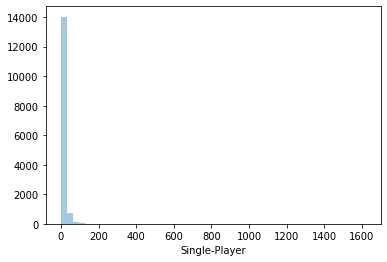

In [24]:
#Esta funcion pone en na todos los que no tienen Main Story, (ya sea porque no tienen o porque es main + extras)
def get_mainStory (dict):
    if "Main Story" in dict.keys():
        return dict["Main Story"][1]/3600

spAverage = dataAux["Single-Player"].apply(lambda x: get_mainStory(x)).dropna()#Promedios
print("Single players Main Story Na: ", dataAux["Single-Player"].shape[0] - spAverage.shape[0])
sns.distplot(spAverage, kde= False);

In [25]:
pd.DataFrame(spAverage.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
Single-Player,14955.0,10.750388,27.601031,0.0,2.3,5.55,11.625,1617.466667


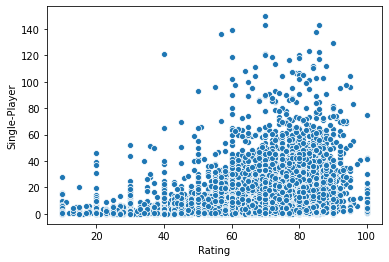

In [26]:
spMainStory = dataAux["Single-Player"].apply(lambda x: get_mainStory(x))
rating = dataAux["Rating"]
sns.scatterplot(rating[spMainStory < 150], spMainStory[spMainStory < 150]);

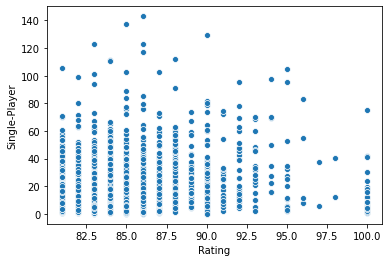

In [27]:
sns.scatterplot(rating[(rating > 80) & (spMainStory < 150)], spMainStory[(rating > 80) & (spMainStory < 150)]);

In [28]:
dataAux.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Single-Player,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers
3,Capsule,Capsule is a single-player survival game playe...,['PC'],NaN,2012-02-04,NaN,NaN,NaN,"{'Main Story': [0, 6060, 6000, 5520, 6600], 'M...",NaN,5.94,"{'PC': [0, 6060, 10800, 8940, 4920, 14400]}",NaN,NaN,NaN,47.0,{'PC': 23},Finji,NaN
7,Fantasy Zone II: The Tears of Opa-Opa,NaN,"['Nintendo 3DS', 'Sega Master System']","[Scrolling, Shooter]",1987-12-09,1988-09-09,NaN,NaN,"{'Main Story': [0, 5160, 5400, 3540, 7020], 'A...",NaN,6.90,"{'Nintendo 3DS': [0, 6480, 0, 0, 3720, 8760], ...",NaN,NaN,NaN,70.0,"{'Nintendo 3DS': 4, 'Sega Master System': 7}",NaN,NaN
11,Siege of Avalon,Siege of Avalon is a traditional fantasy-RPG w...,['PC'],"[Top-Down, Real-Time, Action, Role-Playing]",2000-04-27,NaN,NaN,NaN,"{'Main + Extras': [0, 81060, 93600, 60900, 101...",NaN,11.11,"{'PC': [0, 0, 81060, 0, 34440, 115200]}",NaN,NaN,NaN,40.0,{'PC': 4},NaN,Digital Tome
16,Codename: Outbreak,"In the early 21st century, a meteor storm hits...",['PC'],"[First-Person, Shooter]",2001-11-25,NaN,NaN,NaN,"{'Main Story': [0, 21540, 21540, 17940, 25080]...",NaN,15.38,"{'PC': [0, 21540, 0, 0, 14400, 28680]}",NaN,NaN,NaN,60.0,{'PC': 4},Virgin Interactive,GSC Game World
22,A Bird Story,"From the creator of To the Moon: A simple, wor...",['PC'],Adventure,2014-11-07,2014-11-07,NaN,NaN,"{'Main Story': [0, 4620, 4320, 3120, 7620], 'M...",NaN,2.16,"{'PC': [0, 4620, 5220, 5220, 1800, 18540]}",NaN,NaN,NaN,68.0,{'PC': 1500},Freebird Games,Freebird Games


Se despivotan las columnas Single-Player

In [29]:
dataAux_desp = dataAux.copy()

In [30]:
#Despivote de Additional Content
def despivotar_col(col_name, namePrefix, data):
    #Se obtienen los elementos (keys) de los diccionarios de Single player
    elements = []
    for game in data[col_name]:
            for element in game.keys():
                if element not in elements:
                    elements.append(element)

    print(elements)


    def get_element_from_game(x, element):
        #Dado un elemento del diccionario de "Single player" retorna sus datos
        if type(x) is dict:
            if element in x.keys():
                return x[element]

    #Para cada elemento se añade una columna nueva con SP al principio para idicar que es single player
    for element in elements:
        data[(namePrefix + element)] = data[col_name].apply(lambda x: get_element_from_game(x,element))

    #Se elimina la columna original
    data.drop([col_name], axis='columns', inplace=True)  
    return data

dataAux_desp = despivotar_col("Single-Player", "SP-", dataAux_desp)


['Main Story', 'Main + Extras', 'Completionists', 'All PlayStyles']


In [31]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=False)

dataAux_desp.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Platform N,Publishers,Developers,SP-Main Story,SP-Main + Extras,SP-Completionists,SP-All PlayStyles
3,Capsule,Capsule is a single-player survival game playe...,['PC'],NaN,2012-02-04,NaN,NaN,NaN,NaN,5.94,"{'PC': [0, 6060, 10800, 8940, 4920, 14400]}",NaN,NaN,NaN,47.0,{'PC': 23},Finji,NaN,"[0, 6060, 6000, 5520, 6600]","[0, 10800, 10800, 10800, 10800]","[0, 8940, 7680, 6600, 11340]","[0, 7980, 7140, 6240, 10980]"
7,Fantasy Zone II: The Tears of Opa-Opa,NaN,"['Nintendo 3DS', 'Sega Master System']","[Scrolling, Shooter]",1987-12-09,1988-09-09,NaN,NaN,NaN,6.90,"{'Nintendo 3DS': [0, 6480, 0, 0, 3720, 8760], ...",NaN,NaN,NaN,70.0,"{'Nintendo 3DS': 4, 'Sega Master System': 7}",NaN,NaN,"[0, 5160, 5400, 3540, 7020]",None,None,"[0, 5160, 5400, 3540, 7020]"
11,Siege of Avalon,Siege of Avalon is a traditional fantasy-RPG w...,['PC'],"[Top-Down, Real-Time, Action, Role-Playing]",2000-04-27,NaN,NaN,NaN,NaN,11.11,"{'PC': [0, 0, 81060, 0, 34440, 115200]}",NaN,NaN,NaN,40.0,{'PC': 4},NaN,Digital Tome,None,"[0, 81060, 93600, 60900, 101220]",None,"[0, 81060, 93600, 60900, 101220]"
16,Codename: Outbreak,"In the early 21st century, a meteor storm hits...",['PC'],"[First-Person, Shooter]",2001-11-25,NaN,NaN,NaN,NaN,15.38,"{'PC': [0, 21540, 0, 0, 14400, 28680]}",NaN,NaN,NaN,60.0,{'PC': 4},Virgin Interactive,GSC Game World,"[0, 21540, 21540, 17940, 25080]",None,None,"[0, 21540, 21540, 17940, 25080]"
22,A Bird Story,"From the creator of To the Moon: A simple, wor...",['PC'],Adventure,2014-11-07,2014-11-07,NaN,NaN,NaN,2.16,"{'PC': [0, 4620, 5220, 5220, 1800, 18540]}",NaN,NaN,NaN,68.0,{'PC': 1500},Freebird Games,Freebird Games,"[0, 4620, 4320, 3120, 7620]","[0, 5220, 4620, 4260, 7860]","[0, 5220, 4560, 3900, 11700]","[0, 4920, 4440, 3240, 11580]"


Ahora se juntan las columnas Playable On,  	Platform y  Platform N, asi como se despivotan.

In [32]:
#Se despivota Platform
#Despivote de Additional Content
elements = []
def despivotar_col(col_name, namePrefix, data):
    #Se obtienen los elementos (keys) de los diccionarios de Single player
    for game in dataAux_desp[col_name]:
        if not (type(game) is float):
            for element in game.keys():
                if element not in elements:
                    elements.append(element)

    print(elements)


    def get_element_from_game(x, element):
        #Dado un elemento del diccionario de "Single player" retorna sus datos
        if type(x) is dict:
            if element in x.keys():
                return x[element]

    #Para cada elemento se añade una columna nueva con SP al principio para idicar que es single player
    for element in elements:
        data[(namePrefix + element)] = data[col_name].apply(lambda x: get_element_from_game(x,element))

    #Se elimina la columna original
    data.drop([col_name], axis='columns', inplace=True)  
    return data
    
dataAux_desp = despivotar_col("Platform N","N-", dataAux_desp)

games = elements
#dataAux.head()

['PC', 'Nintendo 3DS', 'Sega Master System', 'PlayStation 3', 'PlayStation 4', 'Xbox 360', 'Nintendo Switch', 'Xbox One', 'NES', 'PlayStation Vita', 'PlayStation', 'Mobile', 'Wii U', 'Game Boy Advance', 'ZX Spectrum', 'Arcade', 'Sega Mega Drive/Genesis', 'PlayStation 2', 'Nintendo DS', 'PSP', 'Nintendo GameCube', 'Sega Saturn', 'Wii', 'Amiga', 'Game Boy Color', 'Emulated', 'NEC PC-9801/21', 'Nintendo 64', 'Super Nintendo', 'Google Stadia', 'Atari 2600', 'PlayStation VR', 'Browser', 'Xbox', 'Game Boy', 'N-Gage', 'Virtual Boy', 'PC VR', 'PlayStation Now', 'Oculus Quest', 'Dreamcast', 'Sega CD', 'Apple II', 'TurboGrafx-16', 'Atari Jaguar', 'Neo Geo', 'OnLive', 'Sega Game Gear', 'Atari Lynx', 'TurboGrafx-CD', 'Commodore 64', 'Neo Geo Pocket', 'Atari 5200', 'Sega 32X', 'WonderSwan', 'Atari 7800', 'Game & Watch', '3DO', 'Ouya', 'MSX', 'Neo Geo CD']


In [33]:
for game in games:
    dataAux_desp["N-" + game] = dataAux_desp["N-" + game].fillna(0)

In [34]:
gameNTotal = []
for game in games:
    gameNTotal.append(dataAux_desp["N-" + game].sum())

In [35]:
np.mean(gameNTotal)

41252.42622950819

In [36]:
topPlatforms = pd.DataFrame(gameNTotal, games)[0][pd.DataFrame(gameNTotal, games)[0] > np.mean(gameNTotal)]

In [37]:
topPlatforms = topPlatforms.sort_values()

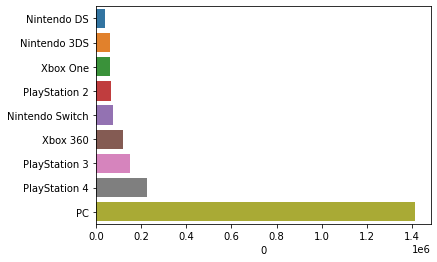

In [38]:
sns.barplot(topPlatforms, topPlatforms.index);

**Despivotar la columna de Generos**

In [39]:
genres = []

#Se obtienen los elementos (keys) de los diccionarios de Single player
for game in dataAux_desp["Genres"]:
    if not (type(game) is float):
        if type(game) is list:
            for element in game:
                if element not in genres:
                    genres.append(element)
            else:
                if element not in genres:
                    genres.append(element)

#print(genres)
def check (x, element):
    if type(x) is float:
        pass
    else:
        if type(x) is list:
            if element in x:
                return 1
            else:
                return 0
        else:
            if x == element:
                return 1
            else:
                return 0
#Para cada elemento se añade una columna nueva con SP al principio para idicar que es single player
for element in genres:
    dataAux_desp[("G-" + element)] = dataAux_desp["Genres"].apply(lambda x: check(x, element))
    
print("done")

done


In [40]:
dataAux_desp.head()

,name,description,Playable On,Genres,NA,EU,JP,Additional Content,Speedrun,Retirement,Platform,Type,Main Game,Multi-Player,Rating,Publishers,Developers,SP-Main Story,SP-Main + Extras,SP-Completionists,SP-All PlayStyles,N-PC,N-Nintendo 3DS,N-Sega Master System,N-PlayStation 3,N-PlayStation 4,N-Xbox 360,N-Nintendo Switch,N-Xbox One,N-NES,N-PlayStation Vita,N-PlayStation,N-Mobile,N-Wii U,N-Game Boy Advance,N-ZX Spectrum,N-Arcade,N-Sega Mega Drive/Genesis,N-PlayStation 2,N-Nintendo DS,N-PSP,N-Nintendo GameCube,N-Sega Saturn,N-Wii,N-Amiga,N-Game Boy Color,N-Emulated,N-NEC PC-9801/21,N-Nintendo 64,N-Super Nintendo,N-Google Stadia,N-Atari 2600,N-PlayStation VR,N-Browser,N-Xbox,N-Game Boy,N-N-Gage,N-Virtual Boy,N-PC VR,N-PlayStation Now,N-Oculus Quest,N-Dreamcast,N-Sega CD,N-Apple II,N-TurboGrafx-16,N-Atari Jaguar,N-Neo Geo,N-OnLive,N-Sega Game Gear,N-Atari Lynx,N-TurboGrafx-CD,N-Commodore 64,N-Neo Geo Pocket,N-Atari 5200,N-Sega 32X,N-WonderSwan,N-Atari 7800,N-Game & Watch,N-3DO,N-Ouya,N-MSX,N-Neo Geo CD,G-Scrolling,G-Shooter,G-Top-Down,G-Real-Time,G-Action,G-Role-Playing,G-First-Person,G-Adventure,G-Puzzle,G-Strategy,G-Multidirectional,G-Platform,G-Survival Horror,G-Point-and-Click,G-Compilation,G-Tactical,G-Arcade,G-Racing/Driving,G-Turn-Based,G-Text,G-Fighting,G-Pinball,G-Horror,G-Survival,G-Third-Person,G-Hidden Object,G-Massively Multiplayer,G-Racing,G-Simulation,G-Stealth,G-Sports,G-Board Game,G-Tower Defense,G-Beat 'em Up,G-Hack and Slash,G-On-Rails,G-Visual Novel,G-City-Building,G-Roguelike,G-Interactive Art,G-Open World,G-Party,G-Car Combat,G-Sandbox,G-Virtual Reality,G-Side,G-Vehicular Combat,G-Battle Arena,G-Music/Rhythm,G-Educational,G-Flight Combat,G-Card Game,G-Flight,G-Fitness,G-Strategy/Tactical,G-Isometric,G-Platformer,G-role-playing,G-Combat Flight Simulator,G-Third-person,G-action-adventure,G-side-scroller,G-Side-scroller,G-Shoot 'em up,G-Flight simulator,G-Shoot-em-up,G-Top-down,G-3-D,G-Survival horror,G-action adventure,G-action,G-adventure,G-City-building,G-Real-time Strategy,G-Light-Gun Shooter,G-Third-person shooter,G-Mecha Simulation,G-Side-Scroller,G-Shoot 'em Up,G-Beat 'em up,G-RPG,G-Graphic adventure,G-Point-and-click adventure,G-Role-playing game,G-Action-adventure game,G-Stealth game,G-Beat,G-Real-time tactics,G-platformer,G-Casual,G-Indie,G-hack and slash,G-educational,G-Music,G-post-retro,G-Scrolling shooter,G-music,G-Various,G-Fighting game,G-Visual novel,G-American football,G-Hack and slash,G-Vehicular combat,G-puzzle,G-First-person,G-Tactical shooter,G-Family,G-first-person shooter,G-Action-adventure,G-platforming,G-Action RPG,G-Adventure game,G-Third-person Shooter,G-Mini-Games,G-FMV,G-Family Games,G-Side scrolling,G-platform,G-Rhythm,G-Exercise,G-Third-person hack and slash,G-First person,G-Sport,G-minigames,G-First-person shooter,G-survival horror,G-Real-Time Strategy,G-Dungeon Crawl,G-Role-playing,G-digital pet,G-Dramatic/Innovative RPG,G-third-person shooter,G-Real-time Tactics,G-interactive movie,G-role playing,G-Aerial combat,G-Driving,G-Third-Person Shooter,G-Science fiction,G-Real-time strategy,G-God game,G-Computer role-playing game,G-Tactical action,G-Card battle,G-turn-based strategy,G-turn-based tactics,G-Hack-and-slash,G-Run and gun,G-Simulator,G-Tactical role-playing game,G-sandbox,G-Combat Simulation,G-Tactics,G-Real-time tactical shooter,G-strategy side-scroller,G-Hack 'n' Slash,G-Medieval Fantasy Action,G-Shooting,G-flight simulator,G-RTS,G-Social simulation,G-Puzzle game,G-City-Builder,G-Space simulation,G-Golf,G-shooter,G-First-person Shooter,G-Dungeon Crawler,G-dungeon crawl,G-Side-scrolling platform,G-shoot 'em up,G-graphic adventure,G-3D Platform,G-Platforming,G-rail shooter,G-Sports game,G-Turn-Based Strategy,G-Wrestling,G-Side-scrolling,G-Moba,G-Turn-based strategy,G-Card Battle,G-Psychological horror,G-Mecha,G-strategy,G-Stealth-based game,G-collectible card game,G-turn-based tactical,G-Stealth action,G-Mecha simulation game,G-run and gun,G-arcade,G-Crossover,G-Beat'em up,G-P

<AxesSubplot:xlabel='Retirement'>

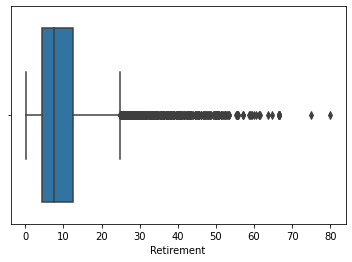

In [41]:
sns.boxplot(x=dataAux_desp["Retirement"])

<AxesSubplot:xlabel='Rating'>

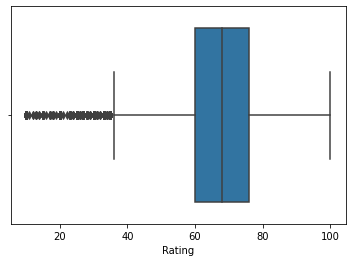

In [42]:
sns.boxplot(x=dataAux_desp["Rating"])

# NA/JP/EU vs Rating

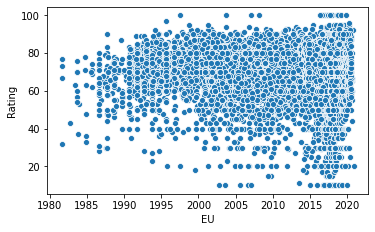

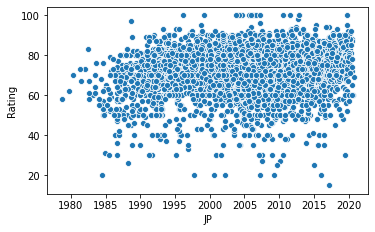

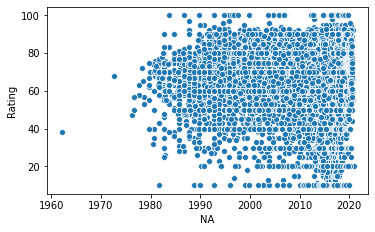

In [43]:
import datetime
launchLocation = ["EU", "JP", "NA"]

rating = dataAux_desp["Rating"]

for ll in launchLocation:

    fig, axs = plt.subplots()
    fig.tight_layout(pad = 4)

    sns.scatterplot(dataAux_desp[ll], rating , ax = axs);


# Top Publishers count and Publishers by rating

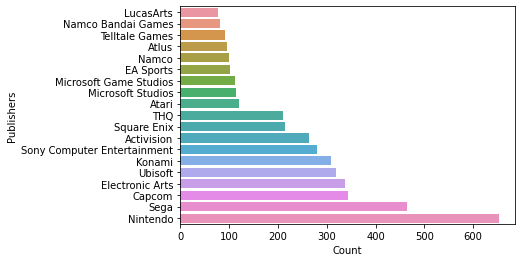

In [44]:
publishers_count=dataAux_desp.groupby(["Publishers"])["Publishers"].count().sort_values()
topPublishers = pd.DataFrame(publishers_count.values, publishers_count.index)

topPublishersAux = topPublishers[topPublishers[0] > 75]

ax = sns.barplot(topPublishersAux[0], topPublishersAux.index)
ax.set(xlabel='Count', ylabel='Publishers');

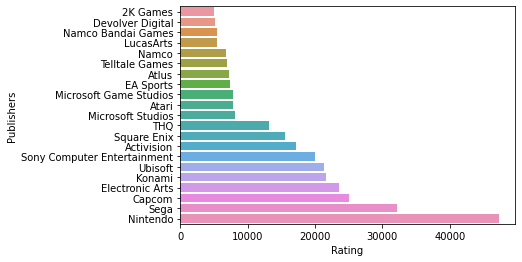

In [45]:
publishers_by_rating = dataAux_desp.groupby(["Publishers"])[["Publishers", "Rating"]].sum().sort_values(by=["Rating"])
top_publishers_by_rating = pd.DataFrame(publishers_by_rating.values, publishers_by_rating.index)

top_publishers_by_ratingAux = top_publishers_by_rating[top_publishers_by_rating[0] > 5000]


ax = sns.barplot(top_publishers_by_ratingAux[0].values, top_publishers_by_ratingAux.index)
ax.set(xlabel='Rating', ylabel='Publishers');

# Top Pevelopers count and Pevelopers by rating

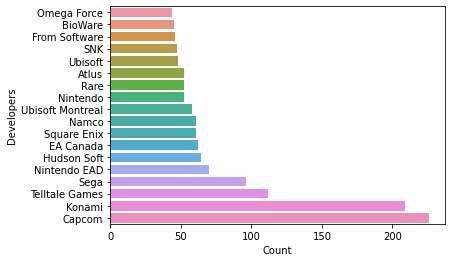

In [46]:
developers_count=dataAux_desp.groupby(["Developers"])["Developers"].count().sort_values()
topDevelopers = pd.DataFrame(developers_count.values, developers_count.index)

topDevelopersAux = topDevelopers[topDevelopers[0] > 40]

ax = sns.barplot(topDevelopersAux[0], topDevelopersAux.index)
ax.set(xlabel='Count', ylabel='Developers');

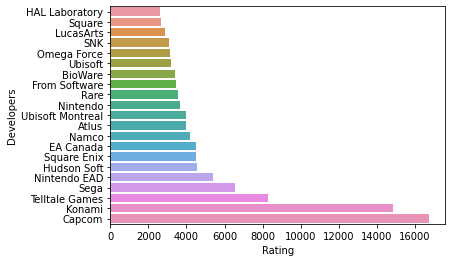

In [47]:
developers_by_rating = dataAux_desp.groupby(["Developers"])[["Developers", "Rating"]].sum().sort_values(by=["Rating"])
top_developers_by_rating = pd.DataFrame(developers_by_rating.values, developers_by_rating.index)

top_developers_by_ratingAux = top_developers_by_rating[top_developers_by_rating[0] > 2500]


ax = sns.barplot(top_developers_by_ratingAux[0].values, top_developers_by_ratingAux.index)
ax.set(xlabel='Rating', ylabel='Developers');

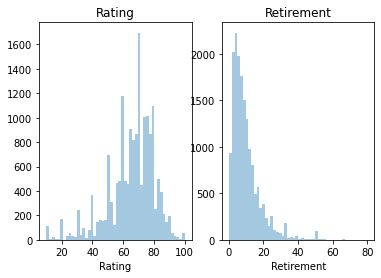

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Rating")
sns.distplot(dataAux_desp["Rating"], kde= False, ax = ax1)
ax2.set_title("Retirement")
sns.distplot(dataAux_desp["Retirement"], kde= False,ax = ax2)
plt.show()

Single players Main Story Na:  1780


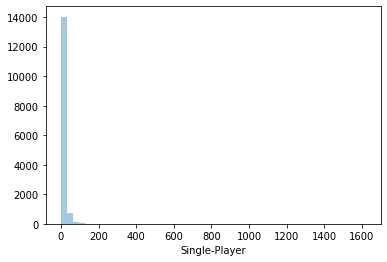

In [49]:
#Esta funcion pone en na todos los que no tienen Main Story, (ya sea porque no tienen o porque es main + extras)
def get_mainStory (dict):
    if "Main Story" in dict.keys():
        return dict["Main Story"][1]/3600

spAverage = dataAux["Single-Player"].apply(lambda x: get_mainStory(x)).dropna()#Promedios
print("Single players Main Story Na: ", dataAux["Single-Player"].shape[0] - spAverage.shape[0])
sns.distplot(spAverage, kde= False);

<AxesSubplot:xlabel='Rating', ylabel='Single-Player'>

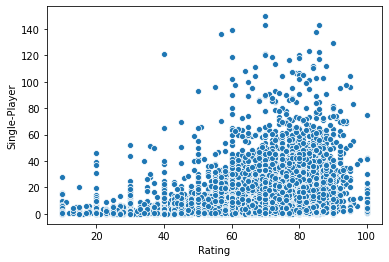

In [50]:
spMainStory = dataAux["Single-Player"].apply(lambda x: get_mainStory(x))
rating = dataAux["Rating"]
sns.scatterplot(rating[spMainStory < 150], spMainStory[spMainStory < 150])

# Main Story/Main+Extras/Completionist/AllPlayStyles vs Rating

In [51]:
def get_mainStoryFormatted (data_list):
    try:
        return data_list[1]/3600
    except Exception as e:
        return data_list

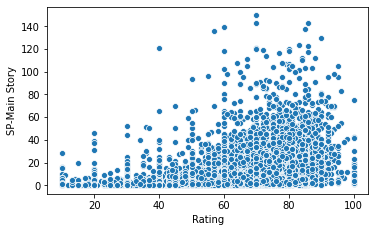

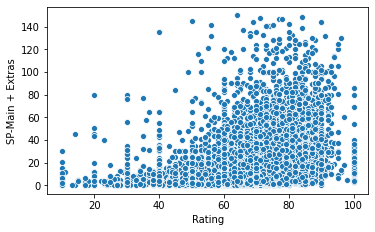

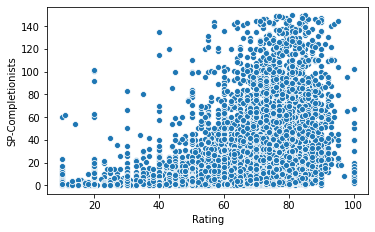

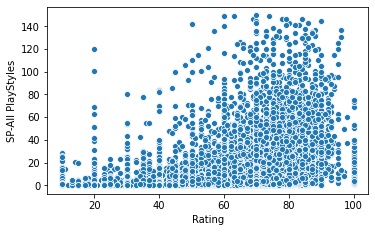

In [52]:
spType = ["SP-Main Story", "SP-Main + Extras", "SP-Completionists", "SP-All PlayStyles"]

rating = dataAux_desp["Rating"]

for sp in spType:

    fig, axs = plt.subplots()
    fig.tight_layout(pad = 4)


    spTime = dataAux_desp[sp].apply(lambda x: get_mainStoryFormatted(x))
    sns.scatterplot(rating[spTime < 150], spTime[spTime < 150], ax = axs);  

# Top Genres by count

In [53]:
r_genres = re.compile('^G\-.*')
findGenCols = np.vectorize(lambda x:bool(r_genres.search(x)))

cols_bool = findGenCols(dataAux_desp.columns.values)
data_genres = dataAux_desp[dataAux_desp.columns[cols_bool]]

r_nums = re.compile('^N\-.*')
findNumsCols = np.vectorize(lambda x:bool(r_nums.search(x)))

cols_bool = findNumsCols(dataAux_desp.columns.values)
data_num_platforms = dataAux_desp[dataAux_desp.columns[cols_bool]]

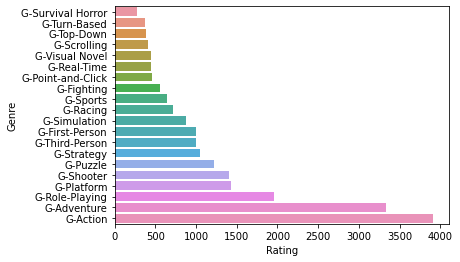

In [54]:
genres_sums = data_genres.sum(axis=0).sort_values()

top_genres_sums = genres_sums[genres_sums.values > 250]

ax = sns.barplot(top_genres_sums.values, top_genres_sums.index)
ax.set(xlabel='Rating', ylabel='Genre');

# Top Platform N by count and rating

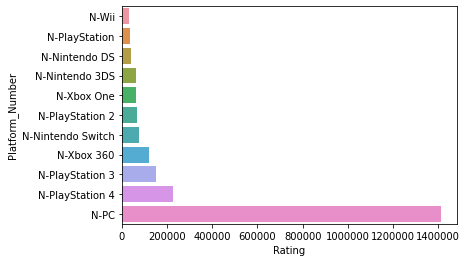

In [55]:
n_platform_sums = data_num_platforms.sum(axis=0).sort_values().astype(int)
top_n_platform_sums = n_platform_sums[n_platform_sums.values > 25000]

ax = sns.barplot(top_n_platform_sums.values, top_n_platform_sums.index)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set(xlabel='Rating', ylabel='Platform_Number');

# Rating vs SP-Main Story vs (Developers/Publishers)

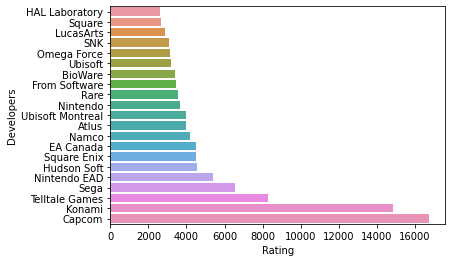

In [56]:
developers_by_rating = dataAux_desp.groupby(["Developers"])[["Developers", "Rating"]].sum().sort_values(by=["Rating"])
top_developers_by_rating = pd.DataFrame(developers_by_rating.values, developers_by_rating.index)

top_developers_by_ratingAux = top_developers_by_rating[top_developers_by_rating[0] > 2500]


ax = sns.barplot(top_developers_by_ratingAux[0].values, top_developers_by_ratingAux.index)
ax.set(xlabel='Rating', ylabel='Developers');

In [57]:
spMainStory = dataAux_desp["SP-Main Story"].apply(lambda x: get_mainStoryFormatted(x))
rating = dataAux_desp["Rating"]

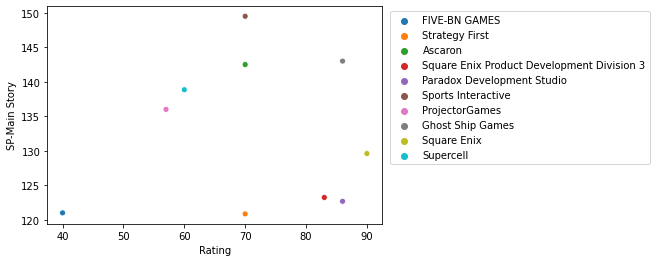

In [58]:
developers = dataAux_desp["Developers"]

sns.scatterplot(rating[(spMainStory < 150) & (spMainStory > 120)], spMainStory[(spMainStory < 150) & (spMainStory > 120)]
                , hue=developers[(spMainStory < 150) & (spMainStory > 120)].values)
plt.legend(bbox_to_anchor=(1.01, 1));

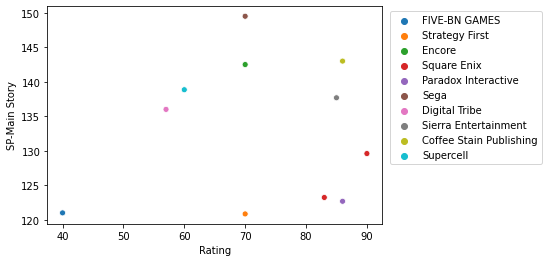

In [59]:
publishers = dataAux_desp["Publishers"]

sns.scatterplot(rating[(spMainStory < 150) & (spMainStory > 120)], spMainStory[(spMainStory < 150) & (spMainStory > 120)]
                , hue=publishers[(spMainStory < 150) & (spMainStory > 120)].values)
plt.legend(bbox_to_anchor=(1.01, 1));

# Rating vs Main Story vs Genre

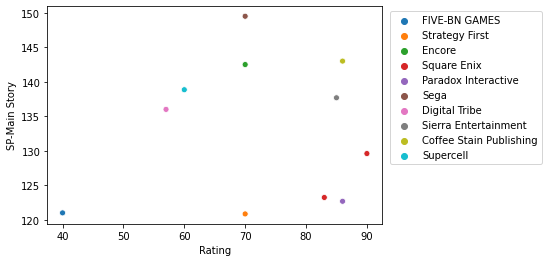

In [60]:
publishers = dataAux_desp["Publishers"]

sns.scatterplot(rating[(spMainStory < 150) & (spMainStory > 120)], spMainStory[(spMainStory < 150) & (spMainStory > 120)]
                , hue=publishers[(spMainStory < 150) & (spMainStory > 120)].values)
plt.legend(bbox_to_anchor=(1.01, 1));

# Correlation Rating vs all SP

In [64]:
spType = ["SP-Main Story", "SP-Main + Extras", "SP-Completionists", "SP-All PlayStyles"]

rating = dataAux_desp["Rating"]

for sp in spType:

    spTime = dataAux_desp[sp].apply(lambda x: get_mainStoryFormatted(x))
    gamesData = {sp: spTime,
        'Rating': rating
        }
    df = pd.DataFrame(gamesData)
    
    print(df.corr())

               SP-Main Story    Rating
SP-Main Story       1.000000  0.162362
Rating              0.162362  1.000000
                  SP-Main + Extras    Rating
SP-Main + Extras          1.000000  0.091958
Rating                    0.091958  1.000000
                   SP-Completionists    Rating
SP-Completionists           1.000000  0.103966
Rating                      0.103966  1.000000
                   SP-All PlayStyles    Rating
SP-All PlayStyles           1.000000  0.060153
Rating                      0.060153  1.000000
